In [1]:
import matplotlib
import numpy as np
import os
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import galsim
from copy import deepcopy
import random

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs
from mejiro.lenses import lens_util

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-065 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-068
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
# debugging = True  # TODO TEMP

if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir

detectable_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=False, verbose=True)

100%|██████████| 18/18 [00:13<00:00,  1.35it/s]


In [3]:
stellar_masses = [np.log10(l.lens_stellar_mass) for l in detectable_lenses]
main_halo_masses = [np.log10(l.main_halo_mass) for l in detectable_lenses]

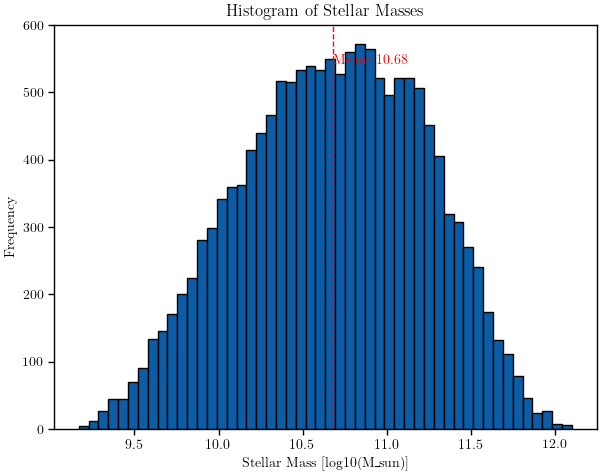

In [4]:
plt.hist(stellar_masses, bins=50, edgecolor='black')
plt.xlabel('Stellar Mass [log10(M_sun)]')
plt.ylabel('Frequency')
mean_stellar_mass = np.mean(stellar_masses)
plt.axvline(mean_stellar_mass, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_stellar_mass, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_stellar_mass:.2f}', color='r')
plt.title('Histogram of Stellar Masses')
plt.show()

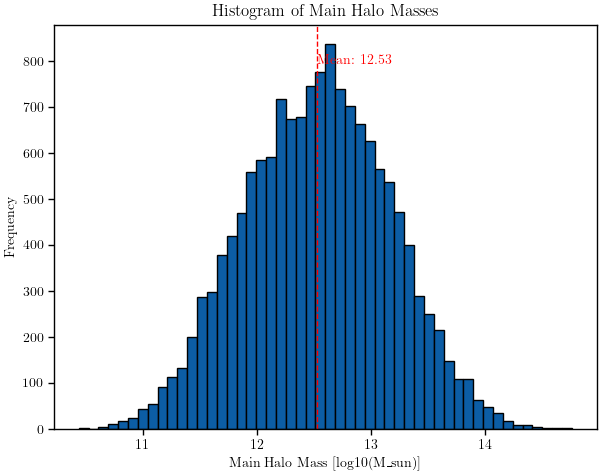

In [5]:
plt.hist(main_halo_masses, bins=50, edgecolor='black')
mean_main_halo_mass = np.mean(main_halo_masses)
plt.axvline(mean_main_halo_mass, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_main_halo_mass, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_main_halo_mass:.2f}', color='r')
plt.xlabel('Main Halo Mass [log10(M_sun)]')
plt.ylabel('Frequency')
plt.title('Histogram of Main Halo Masses')
plt.show()

In [6]:
high_snr_lenses = [l for l in detectable_lenses if l.snr > 200]
print(f'Number of lenses with SNR > 200: {len(high_snr_lenses)}')

Number of lenses with SNR > 200: 78


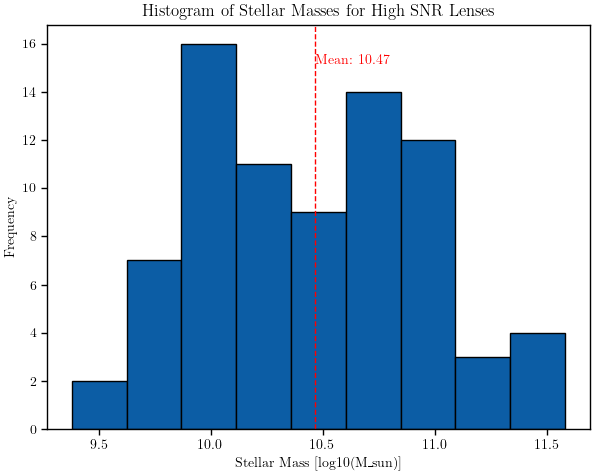

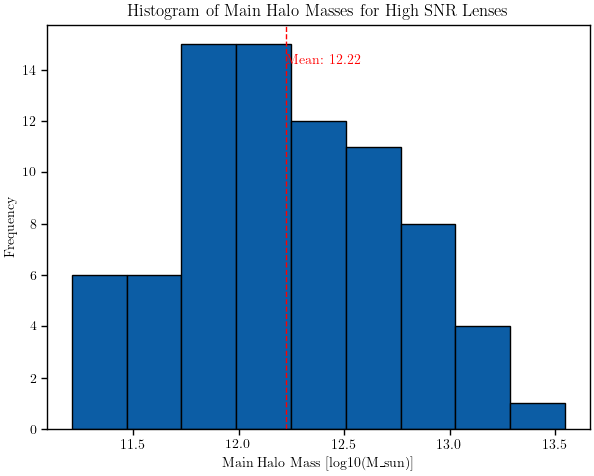

In [7]:
# Extract stellar masses and main halo masses for high SNR lenses
high_snr_stellar_masses = [np.log10(l.lens_stellar_mass) for l in high_snr_lenses]
high_snr_main_halo_masses = [np.log10(l.main_halo_mass) for l in high_snr_lenses]

# Plot histogram for stellar masses of high SNR lenses
plt.hist(high_snr_stellar_masses, bins=9, edgecolor='black')
plt.xlabel('Stellar Mass [log10(M_sun)]')
plt.ylabel('Frequency')
mean_high_snr_stellar_mass = np.mean(high_snr_stellar_masses)
plt.axvline(mean_high_snr_stellar_mass, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_high_snr_stellar_mass, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_high_snr_stellar_mass:.2f}',
         color='r')
plt.title('Histogram of Stellar Masses for High SNR Lenses')
plt.show()

# Plot histogram for main halo masses of high SNR lenses
plt.hist(high_snr_main_halo_masses, bins=9, edgecolor='black')
mean_high_snr_main_halo_mass = np.mean(high_snr_main_halo_masses)
plt.axvline(mean_high_snr_main_halo_mass, color='r', linestyle='dashed', linewidth=1)
plt.text(mean_high_snr_main_halo_mass, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean_high_snr_main_halo_mass:.2f}',
         color='r')
plt.xlabel('Main Halo Mass [log10(M_sun)]')
plt.ylabel('Frequency')
plt.title('Histogram of Main Halo Masses for High SNR Lenses')
plt.show()

Maximum lensing galaxy redshift of high SNR lenses: 0.6174904098219591


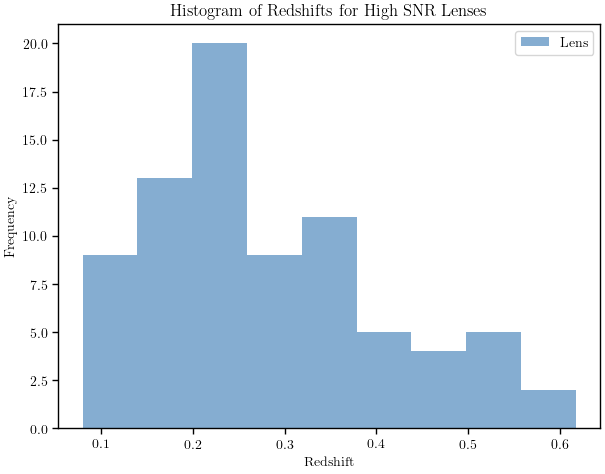

In [14]:
# Extract redshifts for high SNR lenses
high_snr_z_l = [l.z_lens for l in high_snr_lenses]
high_snr_z_s = [l.z_source for l in high_snr_lenses]

print(f'Maximum lensing galaxy redshift of high SNR lenses: {max(high_snr_z_l)}')

# Plot histogram for redshifts of high SNR lenses
plt.hist(high_snr_z_l, bins=9, alpha=0.5, label='Lens')
# plt.hist(high_snr_z_s, bins=9, alpha=0.5, label='Source')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram of Redshifts for High SNR Lenses')
plt.legend()
plt.show()